In [1]:
import util
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
class Autoencoder :
    def __init__(self, D, M) :
        #represents a batch of training data
        #input layer is a 2d vector of size N X D but N can be variable so we leave it as None
        self.X = tf.placeholder(tf.float32, shape = (None, D))
        
        #input -> hidden
        self.W = tf.Variable(tf.random_normal(shape = (D, M)) * 2 / np.sqrt(M))
        self.b = tf.Variable(np.zeros(M).astype(np.float32))
        
        #hidden -> output
        self.V = tf.Variable(tf.random_normal(shape = (M, D)) * 2 / np.sqrt(D))
        self.c = tf.Variable(np.zeros(D).astype(np.float32))
        
        #construct the reconstruction 
        self.Z = tf.nn.relu(tf.matmul(self.X, self.W) + self.b)
        logits = tf.matmul(self.Z, self.V) + self.c
        self.X_hat = tf.nn.sigmoid(logits)
        
        #compute the cost
        self.cost = tf.reduce_sum(
        tf.nn.sigmoid_cross_entropy_with_logits(
            labels = self.X,
            logits=logits
            )
        )
        
        #make the trainer 
        self.train_op = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(self.cost)
        
        #set the session and init variables 
        self.init_op = tf.global_variables_initializer()
        self.sess = tf.InteractiveSession()
        self.sess.run(self.init_op)
        
    def fit(self, X, epochs = 30, batch_size = 64) :
        costs = []
        n_batches = len(X) // batch_size
        print(f'n_batches = {n_batches}')
        
        for i in range(epochs) :
            print(f'epoch : {i}')
            np.random.shuffle(X)
            for j in range(n_batches) :
                batch = X[j * batch_size : (j + 1) * batch_size]
                _, c, = self.sess.run((self.train_op, self.cost), feed_dict= {self.X : batch})
                c /= batch_size
                costs.append(c)
                if j % 100 == 0:
                    print(f'iter : {j}, cost : {c}')
        plt.plot(costs)
        plt.show()
        
    def predict(self, X) :
        return self.sess.run(self.X_hat, feed_dict={self.X : X})

In [5]:
X, Y = util.get_mnist()

Reading in and transforming data...


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
n_batches = 656
epoch : 0
iter : 0, cost : 632.2572631835938
iter : 100, cost : 105.31632232666016
iter : 200, cost : 91.96333312988281
iter : 300, cost : 78.62815856933594
iter : 400, cost : 73.1015625
iter : 500, cost : 72.85794067382812
iter : 600, cost : 64.87625885009766
epoch : 1
iter : 0, cost : 60.052207946777344
iter : 100, cost : 59.07301330566406
iter : 200, cost : 57.025856018066406
iter : 300, cost : 57.17987060546875
iter : 400, cost : 65.69554138183594
iter : 500, cost : 61.060333251953125
iter : 600, cost : 64.9354476928711
epoch : 2
iter : 0, cost : 58.870765686035156
iter : 100, cost : 55.897789001464844
iter : 200, cost : 55.47705841064453
iter : 300, cost : 58.651634216308594
iter : 400, cost : 53.83140563964844
iter : 500, cost : 60.076751708984375
iter : 600, cost : 55.94713592529297
epoch : 3
iter : 0, cost : 57.834007263183594
iter : 100, cost : 

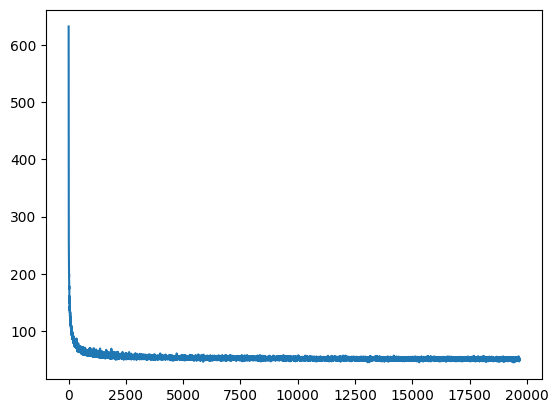

In [6]:
model = Autoencoder(784, 300)
model.fit(X)

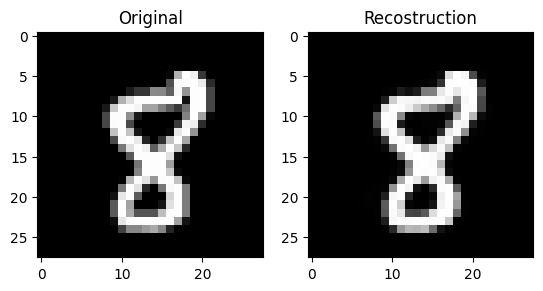

Generate another? a


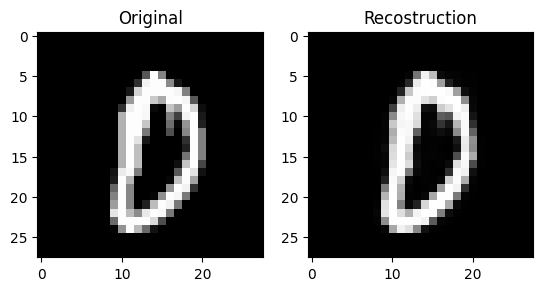

Generate another? a


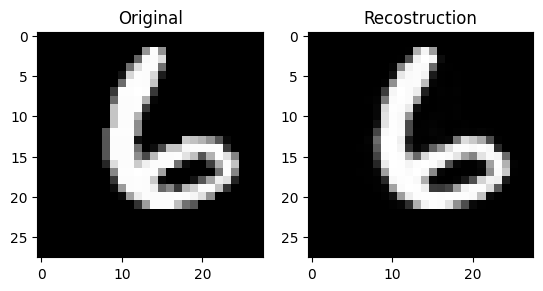

Generate another? d


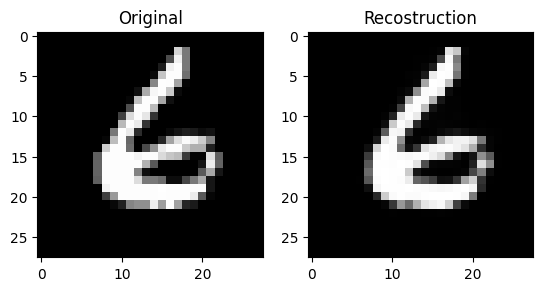

Generate another? c


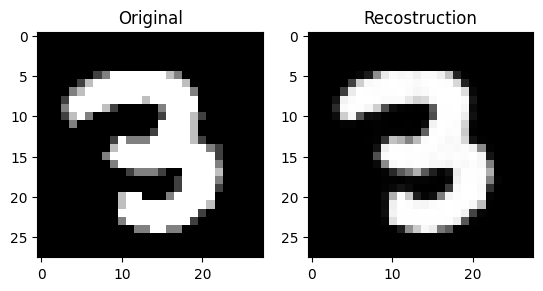

Generate another? c


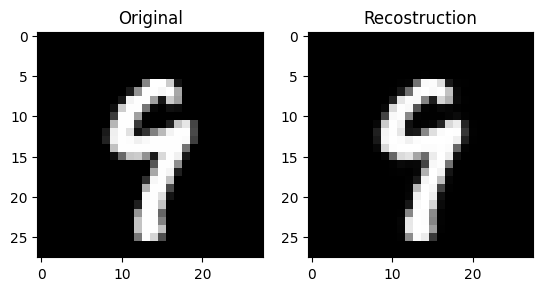

Generate another? n


In [7]:
done = False
while not done :
    i = np.random.choice(len(X))
    x = X[i]
    im = model.predict([x]).reshape(28, 28)
    plt.subplot(1, 2, 1)
    plt.imshow(x.reshape(28, 28), cmap = 'gray')
    plt.title('Original')
    plt.subplot(1, 2, 2)
    plt.imshow(im, cmap = 'gray')
    plt.title('Recostruction')
    plt.show()
    
    ans = input('Generate another?')
    if ans and ans[0] in ('n' or 'N') :
        done = True